In [59]:
import csv

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
from collections import defaultdict

In [62]:
long_data = list()

In [63]:
gene_repr = {
    '5': defaultdict(lambda: 0),
    '3': defaultdict(lambda: 0)
}

In [64]:
with open("../data/homology/ss/out/origin.csv", 'r') as f:
    reader = csv.reader(f)
    next(reader)
    
    for row in reader:
        gene, meta_exon, p, ss, _, gain_ages, loss_ages, pos_group, neg_group, tree_size, _ = row
        
        if ";" in gain_ages or int(tree_size) < 3:
            # `";" in gain_ages` indicates more than one gain event, which
            # we've opted to exclude.
            continue
        
        if gain_ages == "homo_sapiens":
            age = 0
        else:
            age = float(gain_ages)
        
        gene_repr[p][gene] += 1

In [65]:
print(min(gene_repr['5'].values()), max(gene_repr['5'].values()))
print(min(gene_repr['3'].values()), max(gene_repr['3'].values()))

1 17
1 14


In [66]:
N5 = sum([1 for gene in gene_repr['5'] if gene_repr['5'][gene] > 1])
t5 = len(gene_repr['5'])

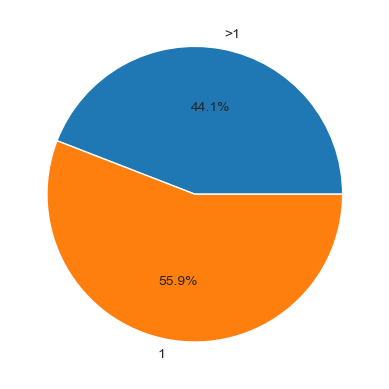

In [67]:
percent5 = N5 / t5 * 100
_ = plt.pie([percent5, 100 - percent5], labels=[">1", "1"], autopct='%1.1f%%')

plt.savefig("figs/main2c_5.pdf")

In [68]:
N3 = sum([1 for gene in gene_repr['3'] if gene_repr['3'][gene] > 1])
t3 = len(gene_repr['3'])

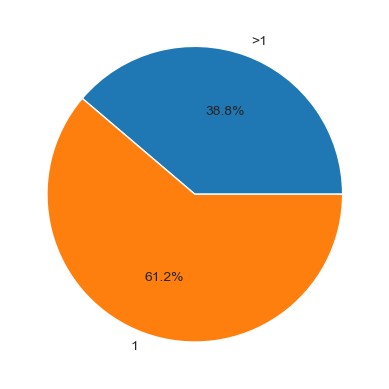

In [69]:
percent3 = N3 / t3 * 100
_ = plt.pie([percent3, 100 - percent3], labels=[">1", "1"], autopct='%1.1f%%')

plt.savefig("figs/main2c_3.pdf")

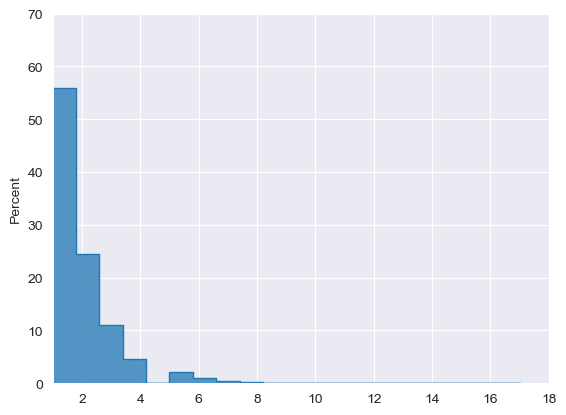

In [70]:
sns.histplot(x=gene_repr['5'].values(), bins=20, element='step', stat='percent')

_ = plt.ylim(0, 70)
_ = plt.xlim(1, 18)

plt.savefig("figs/main2d_5.pdf")

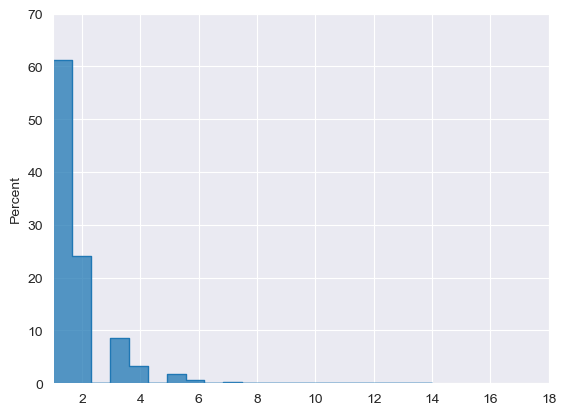

In [71]:
sns.histplot(x=gene_repr['3'].values(), bins=20, element='step', stat='percent')

_ = plt.ylim(0, 70)
_ = plt.xlim(1, 18)

plt.savefig("figs/main2d_3.pdf")